Shreenidhi Kulkarni | 2348455 | 4MDS-B

**LAB-06 : Develop a Convolutional Neural Network (CNN), guiding through the stages of data preprocessing, model design, and training for effective image recognition**

**Aim**
The aim of this project is to develop and train a Convolutional Neural Network (CNN) for image classification on the CIFAR-10 dataset. The CNN model is designed to effectively recognize and categorize images from 10 distinct classes, leveraging layers such as convolutional, pooling, normalization, and fully connected layers to achieve high accuracy in classification tasks.

**Libraries**

* **TensorFlow:** Framework for building and training neural networks.
* **NumPy:** Library for numerical operations and array manipulation.
* **Pickle:** Module for serializing and deserializing Python objects.
* **OS:** Provides functions for interacting with the operating system.
* **Matplotlib:** Library for creating static, animated, and interactive plots.

In [ ]:
pip install tensorflow numpy matplotlib


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [ ]:
# Importing necessary libraries
import tarfile
import pickle
import numpy as np
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [ ]:
# Load and preprocess the dataset
cifar10_dir = "/Users/nidhi/Documents/NNDL/Lab-6/cifar-10-batches-py"

In [ ]:
def load_cifar10_batch(batch_name):
    with open(os.path.join(cifar10_dir, batch_name), 'rb') as file:
        batch = pickle.load(file, encoding='bytes')
        data = batch[b'data']
        labels = batch[b'labels']
        data = data.reshape(len(data), 3, 32, 32).transpose(0, 2, 3, 1)
        return data, np.array(labels)

In [ ]:
def load_cifar10_data():
    x_train, y_train = [], []
    for i in range(1, 6):
        data, labels = load_cifar10_batch(f'data_batch_{i}')
        x_train.append(data)
        y_train.append(labels)
    x_train = np.concatenate(x_train)
    y_train = np.concatenate(y_train)
    x_test, y_test = load_cifar10_batch('test_batch')
    return (x_train, y_train), (x_test, y_test)

In [ ]:
# Load and preprocess the dataset
(x_train, y_train), (x_test, y_test) = load_cifar10_data()

In [ ]:
# Normalize the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [ ]:
# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [ ]:
# Building the CNN model
model = Sequential()

In [ ]:
# Input Layer
model.add(Input(shape=(32, 32, 3)))

In [ ]:
# Convolutional Layer 1
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

In [ ]:
# Convolutional Layer 2
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

In [ ]:
# Convolutional Layer 3
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

In [ ]:
# Flatten the layers
model.add(Flatten())

In [ ]:
# Fully Connected Layer
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

In [ ]:
# Output Layer
model.add(Dense(10, activation='softmax'))

In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Train the model
history = model.fit(x_train, y_train,
                    epochs=20,
                    batch_size=64,
                    validation_data=(x_test, y_test))

Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 18s 22ms/step - accuracy: 0.2784 - loss: 1.9091 - val_accuracy: 0.5056 - val_loss: 1.3775
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 16s 21ms/step - accuracy: 0.4948 - loss: 1.4058 - val_accuracy: 0.5713 - val_loss: 1.2101
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 16s 20ms/step - accuracy: 0.5607 - loss: 1.2355 - val_accuracy: 0.6168 - val_loss: 1.0948
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 15s 20ms/step - accuracy: 0.6132 - loss: 1.1128 - val_accuracy: 0.6509 - val_loss: 0.9915
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 15s 19ms/step - accuracy: 0.6389 - loss: 1.0246 - val_accuracy: 0.6729 - val_loss: 0.9386
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 15s 19ms/step - accuracy: 0.6694 - loss: 0.9469 - val_accuracy: 0.6853 - val_loss: 0.9031
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 15s 19ms/step - accuracy: 0.6895 - loss: 0.8918 - val_accuracy: 0.6955 - val_loss: 0.8693
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 15s 19ms/step - accuracy: 0.7129 - loss: 0.8303 - 

In [ ]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc:.2f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7316 - loss: 0.8813
Test accuracy: 0.73


In [ ]:
# Summary of the model
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 480,608 (1.83 MB)

 Trainable params: 160,202 (625.79 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 320,406 (1.22 MB)

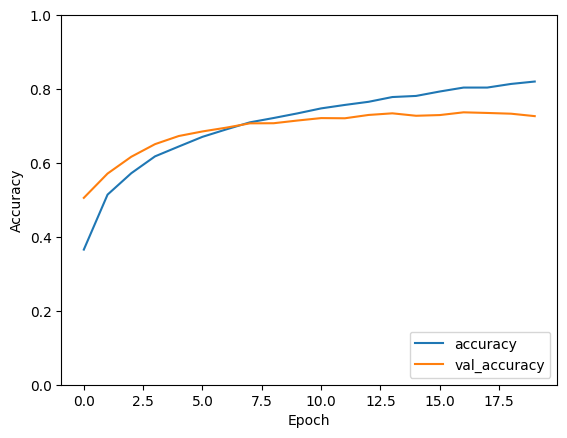

In [ ]:
# Plot the training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

**Conclusion:**


1. **Effectiveness:**
  * The CNN model demonstrates the capability to effectively classify images from the CIFAR-10 dataset with reasonable accuracy. The inclusion of Batch Normalization and dropout layers contributes to better training stability and reduced overfitting.
2. **Model Performance:**
  * The performance of the model is assessed through accuracy metrics and visualized with training and validation loss curves. High accuracy on the test dataset indicates successful learning and generalization by the model.
3. **Future Improvements:**
  * To further enhance the model, additional techniques such as data augmentation, more complex architectures (e.g., deeper CNNs or ResNet), and hyperparameter tuning can be explored.
  * The model could also benefit from evaluating different learning rates and optimization algorithms to improve its performance further.
4. **Applications:**
  * The developed CNN model can be utilized in various real-world applications where image classification is essential, such as object detection, automated tagging, and image search systems.